# Лабораторная работа 4: Парабола

## Вариант 10

In [1]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt

import ipywidgets as widgets
import warnings

np.set_printoptions(precision=4)

# task 9

a_task  = 1
b_task  = 1
mu = 1
f  = lambda x, y, t : np.sin(x) * np.sin(y) * (mu * np.cos(mu*t) + (a_task + b_task) * np.sin(mu*t))

lx = np.pi / 2
ly = np.pi

fixed_min_x = lambda y, t : 0
fixed_max_x = lambda y, t : np.sin(y) * np.sin(mu*t)

fixed_min_y = lambda x, t : 0
fixed_max_y = lambda x, t : -np.sin(x) * np.sin(mu*t)

x_alpha = 0
x_beta  = 1
x_gamma = 0
x_delta = 1

y_alpha = 0
y_beta  = 1
y_gamma = 1
y_delta = 0

initial_values = lambda x, y : 0

analyt_function = lambda x, y, t : np.sin(x) * np.sin(y) * np.sin(mu*t)

# task 10

a_task  = 1
b_task  = 1
mu = 1
f  = lambda x, y, t : np.sin(x) * np.sin(y) * (mu * np.cos(mu*t) + (a_task + b_task) * np.sin(mu*t))

lx = np.pi
ly = np.pi

fixed_min_x = lambda y, t : 0
fixed_max_x = lambda y, t : -np.sin(y) * np.sin(mu*t)

fixed_min_y = lambda x, t : 0
fixed_max_y = lambda x, t : -np.sin(x) * np.sin(mu*t)

x_alpha = 0
x_beta  = 1
x_gamma = 1
x_delta = 0

y_alpha = 0
y_beta  = 1
y_gamma = 1
y_delta = 0

initial_values = lambda x, y : 0

analyt_function = lambda x, y, t : np.sin(x) * np.sin(y) * np.sin(mu*t)

In [2]:
def analytical_solution(nx, ny, nt, t_max):
    hx = lx / (nx - 1)
    hy = ly / (ny - 1)
    ht = t_max / (nt - 1)
    
    grid = np.zeros((nt, nx, ny))
    for t in range(nt):
        for y in range(ny):
            for x in range(nx):
                grid[t, x, y] = analyt_function(x*hx, y*hy, t*ht)
    
    return grid

In [3]:
def solve_tridiagonal(lower, mid, upper, constraints):
    a, b, c, d = map(np.array, (lower, mid, upper, constraints, ))
    x = np.zeros_like(d)
    n = len(d)
    
    for i in range(1, n):
        w = a[i] / b[i - 1]
        b[i] -= w * c[i - 1]
        d[i] -= w * d[i - 1]
    
    x[-1] = d[-1] / b[-1]
    for i in range(n-2, -1, -1):
        x[i] = (d[i] - c[i] * x[i+1]) / b[i]
        
    return x

In [4]:
def alternating_directions(nx, ny, nt, t_max):
    hx = lx / (nx - 1)
    hy = ly / (ny - 1)
    ht = t_max / (nt - 1)

    grid = np.zeros((nt, nx, ny))
    for x in range(nx):
        for y in range(ny):
            grid[0, x, y] = initial_values(x*hx, y*hy) 

    for t in range(nt - 1):
        inter_grid = np.zeros((nx, ny))

        for y in range(ny - 1):
            aa = np.zeros(nx)
            bb = np.zeros(nx)
            cc = np.zeros(nx)
            dd = np.zeros(nx)
            
            coef = a_task / (hx*hx)
            aa[1:-1] = coef
            bb[1:-1] = 1 - 2/ht - 2*coef
            cc[1:-1] = coef

            for x in range(1, nx - 1):
                dd[x] = -2*grid[t, x, y]/ht - b_task*(grid[t, x, y+1] - 2*grid[t, x, y] + grid[t, x, y-1])/(hy*hy) - f(x*hx, y*hy, (t+0.5)*ht)

            bb[0] = hx * x_beta - x_alpha
            cc[0] = x_alpha
            dd[0] = fixed_min_x(y*hy, (t+0.5)*ht) * hx

            aa[-1] = - x_gamma
            bb[-1] = hx * x_delta + x_gamma
            dd[-1] = fixed_max_x(y*hy, (t+0.5)*ht) * hx

            xx = solve_tridiagonal(aa, bb, cc, dd)
            inter_grid[:, y] = xx
            
            for x in range(nx):
                inter_grid[x,  0] = ( fixed_min_y(x*hx, (t+0.5)*ht) - y_alpha * inter_grid[x,  1] / hy ) / (y_beta - y_alpha/hy)
                inter_grid[x, -1] = ( fixed_max_y(x*hx, (t+0.5)*ht) + y_gamma * inter_grid[x, -2] / hy ) / (y_delta + y_gamma/hy)

        for y in range(ny):
            inter_grid[ 0, y] = ( fixed_min_x(y*hy, (t+0.5)*ht) - x_alpha * inter_grid[ 1, y] / hx) / (x_beta - x_alpha/hx)
            inter_grid[-1, y] = ( fixed_max_x(y*hy, (t+0.5)*ht) + x_gamma * inter_grid[-2, y] / hx) / (x_delta + x_gamma/hx)           

        U2 = np.zeros((nx, ny))
        
        for x in range(nx - 1):
            aa = np.zeros(ny)
            bb = np.zeros(ny)
            cc = np.zeros(ny)
            dd = np.zeros(ny)

            coef = b_task / (hy*hy)
            aa[1:-1] = coef
            bb[1:-1] = 1 - 2/ht - 2*coef
            cc[1:-1] = coef
            
            for y in range(1, ny - 1):
                dd[y] = -2*inter_grid[x, y]/ht - a_task*(inter_grid[x+1, y] - 2*inter_grid[x, y] + inter_grid[x-1, y])/(hx*hx) - f(x*hx,y*hy,t*ht)
            
            bb[0] = hy * y_beta - y_alpha
            cc[0] = y_alpha
            dd[0] = fixed_min_y(x*hx,(t+1)*ht)*hy

            aa[-1] = - y_gamma
            bb[-1] = hy*y_delta + y_gamma
            dd[-1] = fixed_max_y(x*hx,(t+1)*ht)*hy           

            xx = solve_tridiagonal(aa, bb, cc, dd)
            grid[t+1,x, :] = xx

            for y in range(ny):
                grid[t+1,  0, y] = ( fixed_min_x(y*hy, (t+1)*ht) - x_alpha * grid[t+1,  1, y] / hx ) / (x_beta - x_alpha/hx)
                grid[t+1, -1, y] = ( fixed_max_x(y*hy, (t+1)*ht) + x_gamma * grid[t+1, -2, y] / hx ) / (x_delta + x_gamma/hx)

        for x in range(nx):
            grid[t+1, x,  0] = ( fixed_min_y(x*hx, (t+1)*ht) - y_alpha * grid[t+1, x,  1] / hy ) / (y_beta - y_alpha/hy)
            grid[t+1, x, -1] = ( fixed_max_y(x*hx, (t+1)*ht) + y_gamma * grid[t+1, x, -2] / hy ) / (y_delta + y_gamma/hy)

    return grid

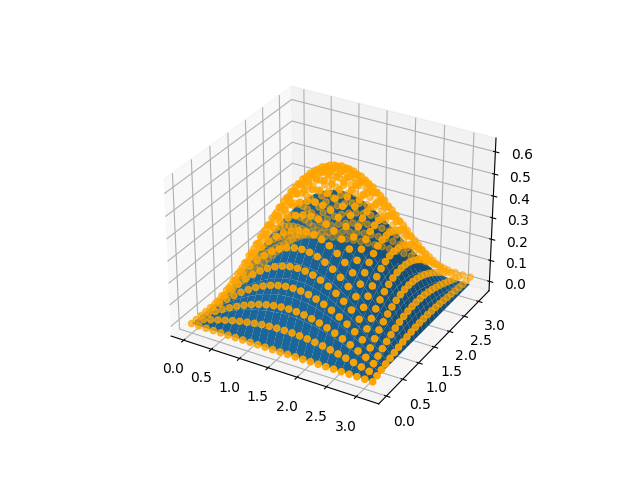

In [5]:
x_count, y_count, t_count, t_max = 25, 25, 20, 1
grid = alternating_directions(x_count, y_count, t_count, t_max)
real_grid = analytical_solution(x_count, y_count, t_count, t_max)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
xs, ys = np.meshgrid(np.linspace(0, lx, x_count), np.linspace(0, ly, y_count))
ax.plot_surface(xs, ys, real_grid[10])
ax.scatter(xs, ys, grid[10], color='orange')

In [6]:
def fractional_steps(nx, ny, nt, t_max):
    hx = lx / (nx - 1)
    hy = ly / (ny - 1)
    ht = t_max / (nt - 1)

    grid = np.zeros((nt, nx, ny))
    for x in range(nx):
        for y in range(ny):
            grid[0, x, y] = initial_values(x * hx, y * hx)

    for t in range(nt - 1):
        inter_grid = np.zeros((nx, ny))

        for y in range(ny - 1):
            aa = np.zeros(nx)
            bb = np.zeros(nx)
            cc = np.zeros(nx)
            dd = np.zeros(nx)
            
            coef = a_task / (hx*hx)
            aa[1:-1] = coef
            bb[1:-1] =  -2*coef - 1/ht
            cc[1:-1] = coef
            
            for x in range(1, nx - 1):
                dd[x] = -1 * grid[t, x, y]/ht - f(x*hx, y*hy, (t+0.5)*ht) / 2

            bb[0] = hx * x_beta - x_alpha
            cc[0] = x_alpha
            dd[0] = fixed_min_x(y*hy, (t+0.5)*ht) * hx

            aa[-1] = - x_gamma
            bb[-1] = hx * x_delta + x_gamma
            dd[-1] = fixed_max_x(y*hy, (t+0.5)*ht) * hx

            xx = solve_tridiagonal(aa, bb, cc, dd)
            inter_grid[:, y] = xx
            
            for x in range(nx):
                inter_grid[x,  0] = ( fixed_min_y(x*hx, (t+0.5)*ht) - y_alpha * inter_grid[x,  1] / hy ) / (y_beta - y_alpha / hy)
                inter_grid[x, -1] = ( fixed_max_y(x*hx, (t+0.5)*ht) + y_gamma * inter_grid[x, -2] / hy ) / (y_delta + y_gamma / hy)

        for y in range(ny):
            inter_grid[0,  y] = ( fixed_min_x(y*hy, (t+0.5)*ht) - x_alpha * inter_grid[1,  y] / hx) / (x_beta - x_alpha / hx)
            inter_grid[-1, y] = ( fixed_max_x(y*hy, (t+0.5)*ht) + x_gamma * inter_grid[-2, y] / hx) / (x_delta + x_gamma / hx)       

        for x in range(nx - 1):
            aa = np.zeros(ny)
            bb = np.zeros(ny)
            cc = np.zeros(ny)
            dd = np.zeros(ny)

            coef = b_task / (hy*hy) 
            aa[1:-1] = coef
            bb[1:-1] =  -2*coef - 1/ht
            cc[1:-1] = coef

            for y in range(1, ny - 1):
                dd[y] = -1 * inter_grid[x, y]/ht - f(x*hx, y*hy, (t+1)*ht) / 2

            bb[0] = hy * y_beta - y_alpha
            cc[0] = y_alpha
            dd[0] = fixed_min_y(x*hx, (t+1)*ht) * hy

            aa[-1] = - y_gamma
            bb[-1] = hy * y_delta + y_gamma
            dd[-1] = fixed_max_y(x*hx, (t+1)*ht) * hy           
    
            xx = solve_tridiagonal(aa, bb, cc, dd)            
            grid[t+1, x, :] = xx

            for y in range(ny):
                grid[t+1,  0, y] = ( fixed_min_x(y*hy, (t+1)*ht) - x_alpha * grid[t+1,  1, y] / hx ) / (x_beta - x_alpha / hx)
                grid[t+1, -1, y] = ( fixed_max_x(y*hy, (t+1)*ht) + x_gamma * grid[t+1, -2, y] / hx ) / (x_delta + x_gamma / hx)

        for x in range(nx):
            grid[t+1, x,  0] = ( fixed_min_y(x*hx, (t+1)*ht) - y_alpha * grid[t+1, x,  1] / hy ) / (y_beta - y_alpha / hy)
            grid[t+1, x, -1] = ( fixed_max_y(x*hx, (t+1)*ht) + y_gamma * grid[t+1, x, -2] / hy ) / (y_delta + y_gamma / hy)

    return grid


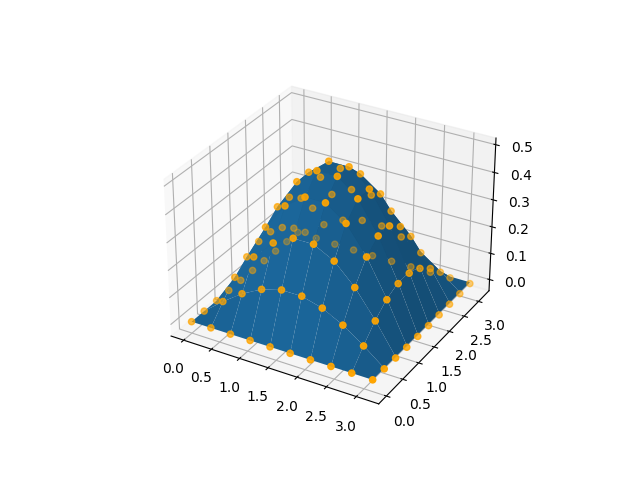

In [7]:
x_count, y_count, t_count, t_max = 10, 10, 20, 1
grid = fractional_steps(x_count, y_count, t_count, t_max)
real_grid = analytical_solution(x_count, y_count, t_count, t_max)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
xs, ys = np.meshgrid(np.linspace(0, lx, x_count), np.linspace(0, ly, y_count))
ax.plot_surface(xs, ys, real_grid[10])
ax.scatter(xs, ys, grid[10], color='orange')